In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.circuit.library.standard_gates import RYGate
from qiskit.circuit import Delay
from math import pi

import sys
import os

sys.path.append(os.path.abspath("..\\..\\..\\.."))
from metrics.IBM.get_calibration_data import get_calibration_data, get_best_qubits



In [2]:
# https://quantumcomputing.stackexchange.com/questions/27991/decoherence-graph-of-t-1-t-2-t-2-in-ibmq

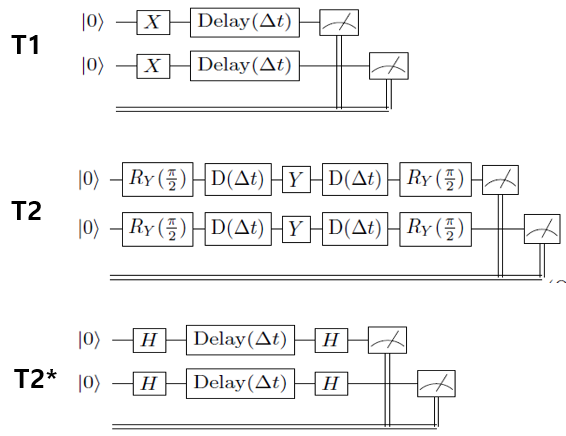

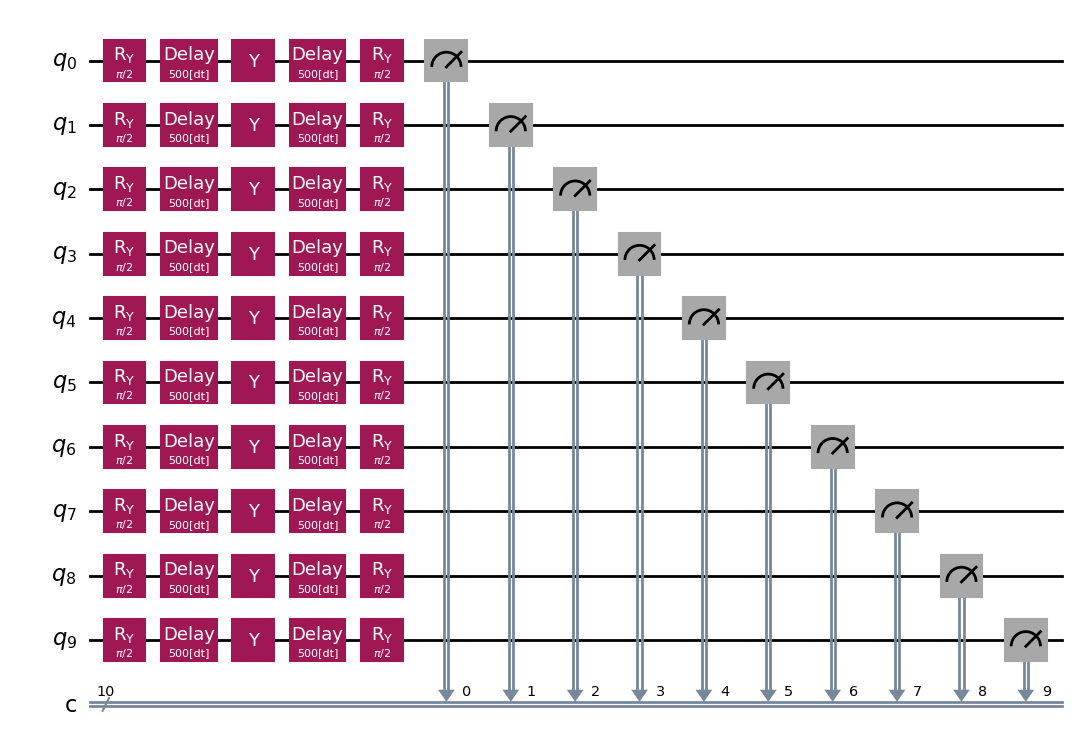

In [3]:
# T2 circuit

def load_circuit(delay, qb_len=1):
    qc = QuantumCircuit(qb_len, qb_len)

    
    for i in range(qb_len):
        qc.append(RYGate(pi/2), [i]) # |0> -> |+>
        qc.append(Delay(int(delay/2)), [i])
        qc.y([i]) # |+> -> |->
        qc.append(Delay(int(delay/2)), [i])
        qc.append(RYGate(pi/2), [i]) # |-> -> |0>
    qc.measure(range(qb_len), range(qb_len))

    return qc

qc = load_circuit(1000, 10)
qc.draw('mpl')



In [4]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")
data_csv = 'ibm_brisbane_calibrations_2025-01-04T20_33_16Z.csv'

In [5]:
best_T2_qubits = get_best_qubits(data_csv, lambda x: x.T2, 10)
print(*[f"{q.Qubit}, T2={round(q.T2, 3)}" for q in best_T2_qubits], sep= '\n')

11, T2=375.962
36, T2=336.765
29, T2=321.721
71, T2=315.14
53, T2=287.27
109, T2=280.315
110, T2=279.64
101, T2=273.752
116, T2=248.805
51, T2=246.376


In [6]:
isa_circuit = transpile(qc, backend, scheduling_method="asap", optimization_level=3, initial_layout=[q.Qubit for q in best_T2_qubits])
print(f"Circuit Depth: {qc.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')

Circuit Depth: 6
Transpiled Circuit Depth: 11


In [7]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [8]:
t_array = [t*5_000 for t in range(0, 81)]
print([round(t*dt * 10**(-3),2) for t in t_array])

[0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50.0, 52.5, 55.0, 57.5, 60.0, 62.5, 65.0, 67.5, 70.0, 72.5, 75.0, 77.5, 80.0, 82.5, 85.0, 87.5, 90.0, 92.5, 95.0, 97.5, 100.0, 102.5, 105.0, 107.5, 110.0, 112.5, 115.0, 117.5, 120.0, 122.5, 125.0, 127.5, 130.0, 132.5, 135.0, 137.5, 140.0, 142.5, 145.0, 147.5, 150.0, 152.5, 155.0, 157.5, 160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5, 180.0, 182.5, 185.0, 187.5, 190.0, 192.5, 195.0, 197.5, 200.0]


In [9]:
circuits = []

for t in t_array:

    qc = load_circuit(t, qb_len=10)

    isa_circuit = transpile(qc, backend, scheduling_method="asap", optimization_level=3, initial_layout=[q.Qubit for q in best_T2_qubits])
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} μs")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
    # c.draw(output='mpl')

Circuit Depth: 9
Delay Duration: 0.0 μs
Total Duration: 1.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 2.5 μs
Total Duration: 3.984 μs

Circuit Depth: 11
Delay Duration: 5.0 μs
Total Duration: 6.48 μs

Circuit Depth: 11
Delay Duration: 7.5 μs
Total Duration: 8.984 μs

Circuit Depth: 11
Delay Duration: 10.0 μs
Total Duration: 11.48 μs

Circuit Depth: 11
Delay Duration: 12.5 μs
Total Duration: 13.984 μs

Circuit Depth: 11
Delay Duration: 15.0 μs
Total Duration: 16.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: De

Circuit Depth: 11
Delay Duration: 17.5 μs
Total Duration: 18.984 μs

Circuit Depth: 11
Delay Duration: 20.0 μs
Total Duration: 21.48 μs

Circuit Depth: 11
Delay Duration: 22.5 μs
Total Duration: 23.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 25.0 μs
Total Duration: 26.48 μs

Circuit Depth: 11
Delay Duration: 27.5 μs
Total Duration: 28.984 μs

Circuit Depth: 11
Delay Duration: 30.0 μs
Total Duration: 31.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 32.5 μs
Total Duration: 33.984 μs

Circuit Depth: 11
Delay Duration: 35.0 μs
Total Duration: 36.48 μs

Circuit Depth: 11
Delay Duration: 37.5 μs
Total Duration: 38.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 40.0 μs
Total Duration: 41.48 μs

Circuit Depth: 11
Delay Duration: 42.5 μs
Total Duration: 43.984 μs

Circuit Depth: 11
Delay Duration: 45.0 μs
Total Duration: 46.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 47.5 μs
Total Duration: 48.984 μs

Circuit Depth: 11
Delay Duration: 50.0 μs
Total Duration: 51.48 μs

Circuit Depth: 11
Delay Duration: 52.5 μs
Total Duration: 53.984 μs

Circuit Depth: 11
Delay Duration: 55.0 μs
Total Duration: 56.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: De

Circuit Depth: 11
Delay Duration: 57.5 μs
Total Duration: 58.984 μs

Circuit Depth: 11
Delay Duration: 60.0 μs
Total Duration: 61.48 μs

Circuit Depth: 11
Delay Duration: 62.5 μs
Total Duration: 63.984 μs

Circuit Depth: 11
Delay Duration: 65.0 μs
Total Duration: 66.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: De

Circuit Depth: 11
Delay Duration: 67.5 μs
Total Duration: 68.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 70.0 μs
Total Duration: 71.48 μs

Circuit Depth: 11
Delay Duration: 72.5 μs
Total Duration: 73.984 μs

Circuit Depth: 11
Delay Duration: 75.0 μs
Total Duration: 76.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 77.5 μs
Total Duration: 78.984 μs

Circuit Depth: 11
Delay Duration: 80.0 μs
Total Duration: 81.48 μs

Circuit Depth: 11
Delay Duration: 82.5 μs
Total Duration: 83.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 85.0 μs
Total Duration: 86.48 μs

Circuit Depth: 11
Delay Duration: 87.5 μs
Total Duration: 88.984 μs

Circuit Depth: 11
Delay Duration: 90.0 μs
Total Duration: 91.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 92.5 μs
Total Duration: 93.984 μs

Circuit Depth: 11
Delay Duration: 95.0 μs
Total Duration: 96.48 μs

Circuit Depth: 11
Delay Duration: 97.5 μs
Total Duration: 98.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 100.0 μs
Total Duration: 101.48 μs

Circuit Depth: 11
Delay Duration: 102.5 μs
Total Duration: 103.984 μs

Circuit Depth: 11
Delay Duration: 105.0 μs
Total Duration: 106.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 107.5 μs
Total Duration: 108.984 μs

Circuit Depth: 11
Delay Duration: 110.0 μs
Total Duration: 111.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 112.5 μs
Total Duration: 113.984 μs

Circuit Depth: 11
Delay Duration: 115.0 μs
Total Duration: 116.48 μs

Circuit Depth: 11
Delay Duration: 117.5 μs
Total Duration: 118.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 120.0 μs
Total Duration: 121.48 μs

Circuit Depth: 11
Delay Duration: 122.5 μs
Total Duration: 123.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 125.0 μs
Total Duration: 126.48 μs

Circuit Depth: 11
Delay Duration: 127.5 μs
Total Duration: 128.984 μs

Circuit Depth: 11
Delay Duration: 130.0 μs
Total Duration: 131.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 132.5 μs
Total Duration: 133.984 μs

Circuit Depth: 11
Delay Duration: 135.0 μs
Total Duration: 136.48 μs

Circuit Depth: 11
Delay Duration: 137.5 μs
Total Duration: 138.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 140.0 μs
Total Duration: 141.48 μs

Circuit Depth: 11
Delay Duration: 142.5 μs
Total Duration: 143.984 μs

Circuit Depth: 11
Delay Duration: 145.0 μs
Total Duration: 146.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 147.5 μs
Total Duration: 148.984 μs

Circuit Depth: 11
Delay Duration: 150.0 μs
Total Duration: 151.48 μs

Circuit Depth: 11
Delay Duration: 152.5 μs
Total Duration: 153.984 μs

Circuit Depth: 11
Delay Duration: 155.0 μs
Total Duration: 156.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: De

Circuit Depth: 11
Delay Duration: 157.5 μs
Total Duration: 158.984 μs

Circuit Depth: 11
Delay Duration: 160.0 μs
Total Duration: 161.48 μs

Circuit Depth: 11
Delay Duration: 162.5 μs
Total Duration: 163.984 μs

Circuit Depth: 11
Delay Duration: 165.0 μs
Total Duration: 166.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: De

Circuit Depth: 11
Delay Duration: 167.5 μs
Total Duration: 168.984 μs

Circuit Depth: 11
Delay Duration: 170.0 μs
Total Duration: 171.48 μs

Circuit Depth: 11
Delay Duration: 172.5 μs
Total Duration: 173.984 μs

Circuit Depth: 11
Delay Duration: 175.0 μs
Total Duration: 176.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: De

Circuit Depth: 11
Delay Duration: 177.5 μs
Total Duration: 178.984 μs

Circuit Depth: 11
Delay Duration: 180.0 μs
Total Duration: 181.48 μs

Circuit Depth: 11
Delay Duration: 182.5 μs
Total Duration: 183.984 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 185.0 μs
Total Duration: 186.48 μs

Circuit Depth: 11
Delay Duration: 187.5 μs
Total Duration: 188.984 μs

Circuit Depth: 11
Delay Duration: 190.0 μs
Total Duration: 191.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 11
Delay Duration: 192.5 μs
Total Duration: 193.984 μs

Circuit Depth: 11
Delay Duration: 195.0 μs
Total Duration: 196.48 μs

Circuit Depth: 11
Delay Duration: 197.5 μs
Total Duration: 198.984 μs

Circuit Depth: 11
Delay Duration: 200.0 μs
Total Duration: 201.48 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_49376\2406943209.py:12: De

In [10]:
def get_layout(circuit, qb_len=1):
    layout = circuit._layout.initial_layout.get_virtual_bits()
    print(layout)
    keys = [layout[i] for i in layout]
    return keys[:qb_len]

# for c in circuits:
#     get_layout(c, qb_len=10)

data_qubits, data_edges = get_calibration_data(data_csv)

layout = get_layout(circuits[0], qb_len=10)

print(layout)

{Qubit(QuantumRegister(10, 'q'), 0): 11, Qubit(QuantumRegister(10, 'q'), 1): 36, Qubit(QuantumRegister(10, 'q'), 2): 29, Qubit(QuantumRegister(10, 'q'), 3): 71, Qubit(QuantumRegister(10, 'q'), 4): 53, Qubit(QuantumRegister(10, 'q'), 5): 109, Qubit(QuantumRegister(10, 'q'), 6): 110, Qubit(QuantumRegister(10, 'q'), 7): 101, Qubit(QuantumRegister(10, 'q'), 8): 116, Qubit(QuantumRegister(10, 'q'), 9): 51, Qubit(QuantumRegister(117, 'ancilla'), 0): 0, Qubit(QuantumRegister(117, 'ancilla'), 1): 1, Qubit(QuantumRegister(117, 'ancilla'), 2): 2, Qubit(QuantumRegister(117, 'ancilla'), 3): 3, Qubit(QuantumRegister(117, 'ancilla'), 4): 4, Qubit(QuantumRegister(117, 'ancilla'), 5): 5, Qubit(QuantumRegister(117, 'ancilla'), 6): 6, Qubit(QuantumRegister(117, 'ancilla'), 7): 7, Qubit(QuantumRegister(117, 'ancilla'), 8): 8, Qubit(QuantumRegister(117, 'ancilla'), 9): 9, Qubit(QuantumRegister(117, 'ancilla'), 10): 10, Qubit(QuantumRegister(117, 'ancilla'), 11): 12, Qubit(QuantumRegister(117, 'ancilla'), 

In [11]:
sampler = SamplerV2(backend=backend)
shots = 100
# job = sampler.run(circuits, shots=shots)
job = service.job('cxwvj7rwk6yg008j1fe0') # t_array = [t*5_000 for t in range(0, 81)]
pub_result = job.result()

In [12]:
import numpy as np

# print("error rate:")

results = []

for i in range(len(t_array)):
    result = pub_result[i]
    meas = result['__value__']['data']['c'].get_counts()
    
    qubit_results = {}

    # print(f"@ {t_array[i]*dt/1000}us")

    for q in range(10):
        qubit_results[q] = {
            '0': np.sum([meas[r] for r in meas if r[9-q] == '0']),
            '1': np.sum([meas[r] for r in meas if r[9-q] == '1']),
        }

    # print(*[f"\t {round(qubit_results[q]['0'])}%" for q in range(10)])

    results.append(qubit_results)

    # print(qubit_results)

    

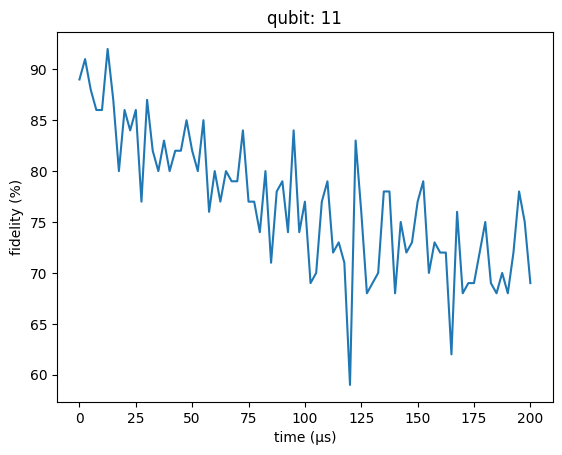

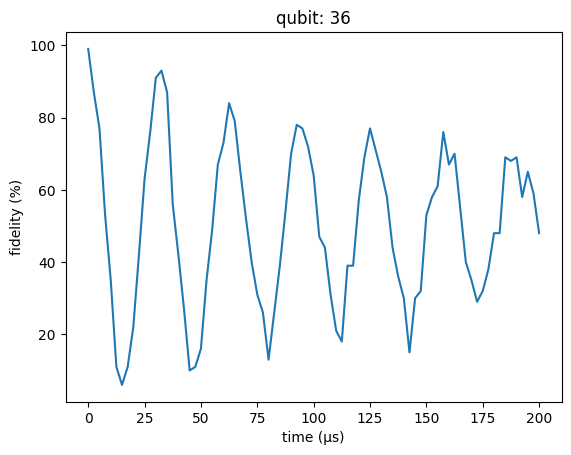

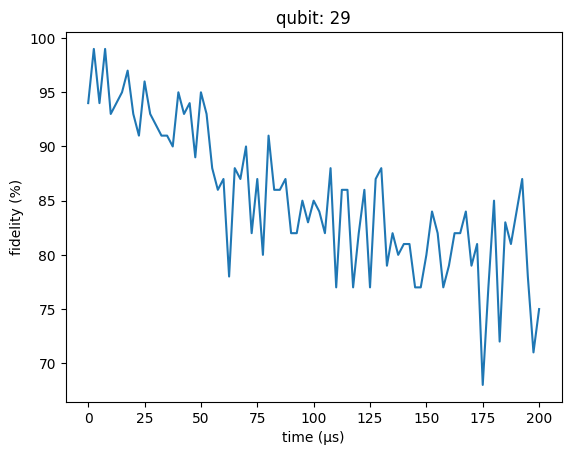

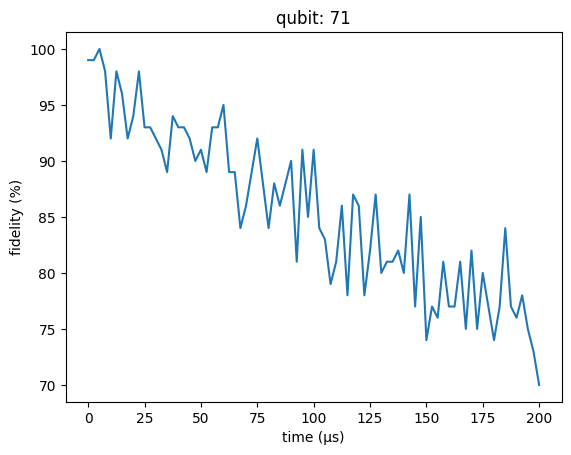

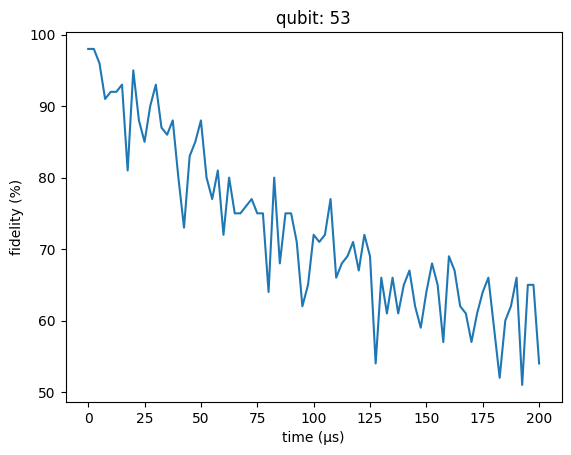

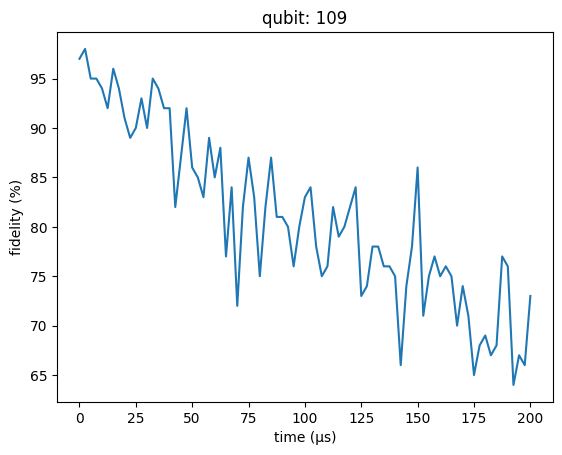

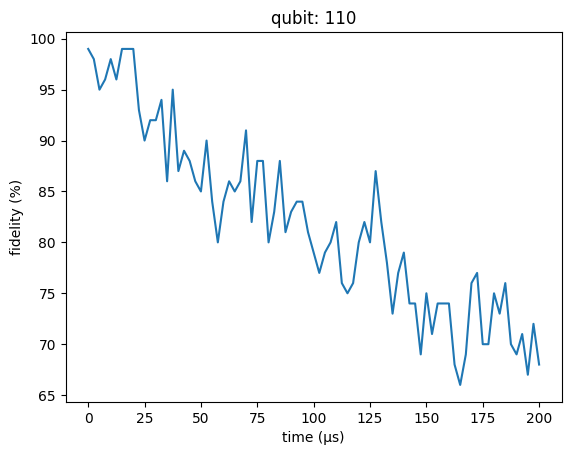

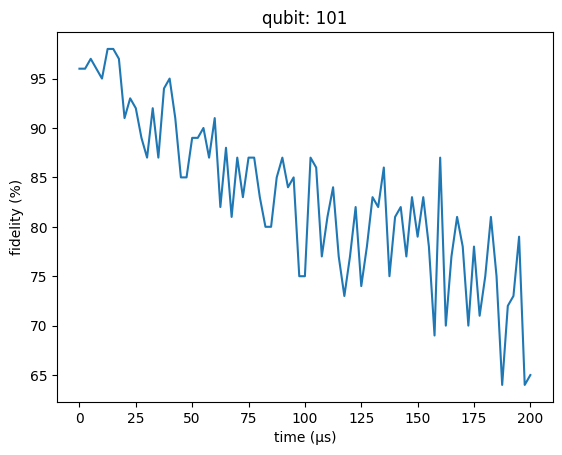

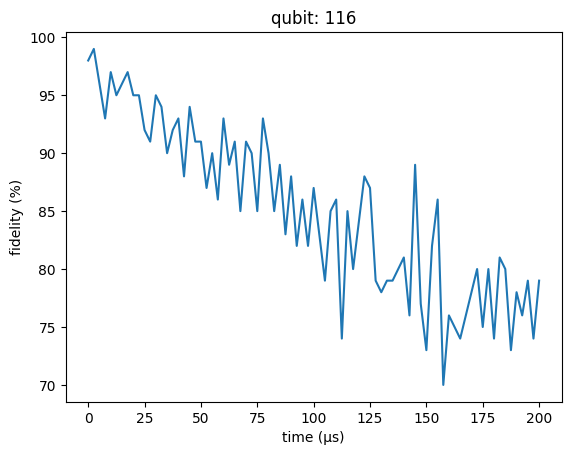

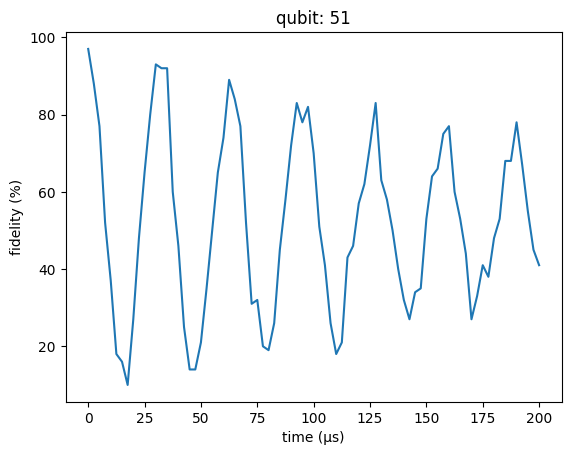

In [13]:
import matplotlib.pyplot as plt
import math

# Example data arrays
x = [t*dt/1000 for t in t_array]
y = [[(r[q]['0']) for r in results] for q in range(10)]

# plt.axhline(y=-1, color='r', linestyle='--')

# Create the plot
# for q in range(10):
for q in range(10):
    plt.plot(x, y[q])

    # Add labels and title
    plt.xlabel('time (μs)')
    plt.ylabel('fidelity (%)')
    plt.title(f'qubit: {best_T2_qubits[q].Qubit}')
    # plt.legend()

    # Display the plot
    plt.show()

Parámetro T2 estimado: 182.11 μs
Parámetro ω estimado: -198.82 kHz
T2 real: 336.76 μs


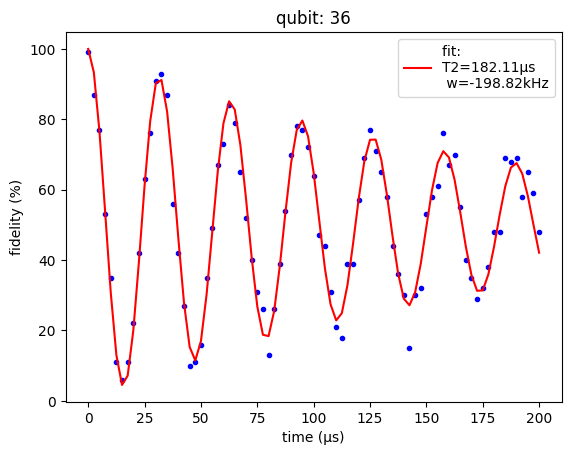

Parámetro T2 estimado: 189.82 μs
Parámetro ω estimado: 199.33 kHz
T2 real: 246.38 μs


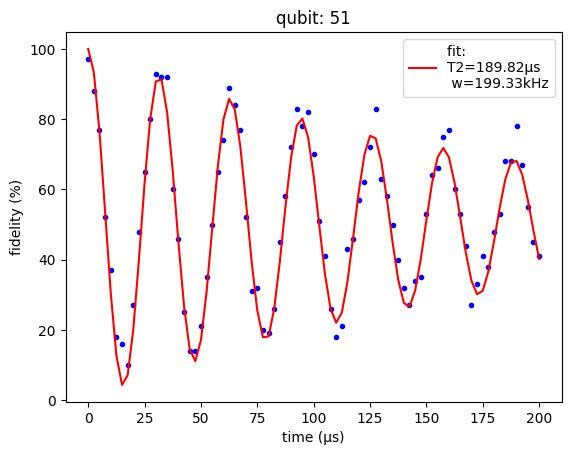

In [14]:
from scipy.optimize import curve_fit

# Definir la función modelo
def model_exp_cos(t, T2, w):
    return 50 * (1 + np.exp(-t/T2) * np.cos(w * t) )

# Datos de ejemplo (t y y)
t_data = np.array(x)  # Valores de t

for q in [1,9]:

    y_data = np.array(y[q])  # Valores de y

    # Ajustar la curva a los datos
    params, covariance = curve_fit(model_exp_cos, t_data, y_data, p0=[1.0, 1.0])

    # Parámetros ajustados
    T2_estimated, w_estimated = params
    w_estimated *= 1000
    print(f"Parámetro T2 estimado: {round(T2_estimated,2)} μs")
    print(f"Parámetro ω estimado: {round(w_estimated,2)} kHz")
    print(f"T2 real: {round(best_T2_qubits[q].T2,2)} μs")

    y_results = [model_exp_cos(t, *params) for t in t_data]

    plt.plot(t_data, y_data, 'b.')
    plt.plot(t_data, y_results, 'r-', label='fit: \nT2=%5.2fμs\n w=%5.2fkHz' % (T2_estimated, w_estimated))
    plt.xlabel('time (μs)')
    plt.ylabel('fidelity (%)')
    plt.title(f'qubit: {best_T2_qubits[q].Qubit}')
    plt.legend()

    # Display the plot
    plt.show()


Parámetro T2 estimado: 421.62 μs
T2 real: 375.96 μs


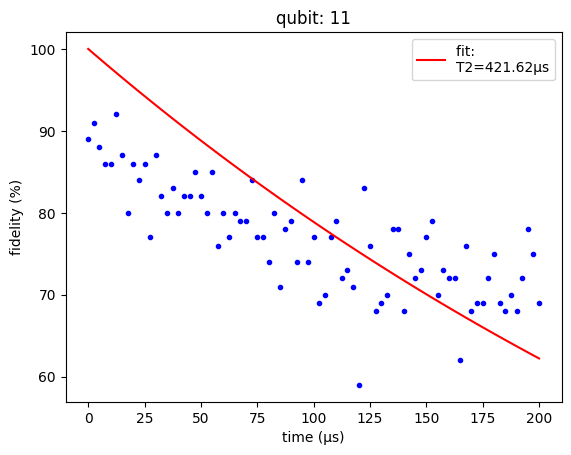

Parámetro T2 estimado: 666.56 μs
T2 real: 321.72 μs


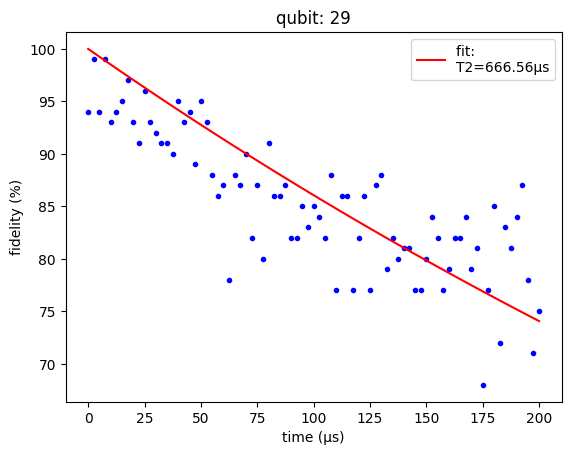

Parámetro T2 estimado: 650.1 μs
T2 real: 315.14 μs


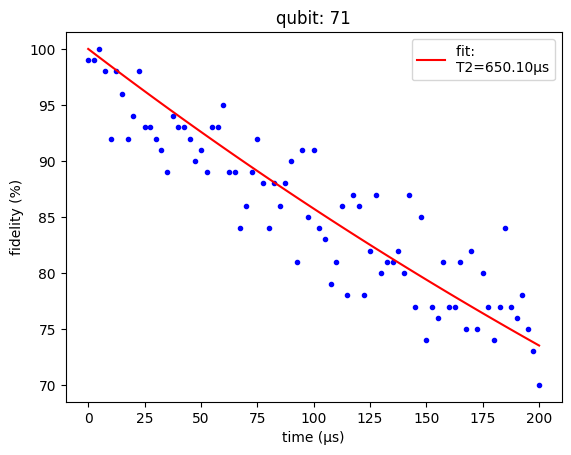

Parámetro T2 estimado: 315.21 μs
T2 real: 287.27 μs


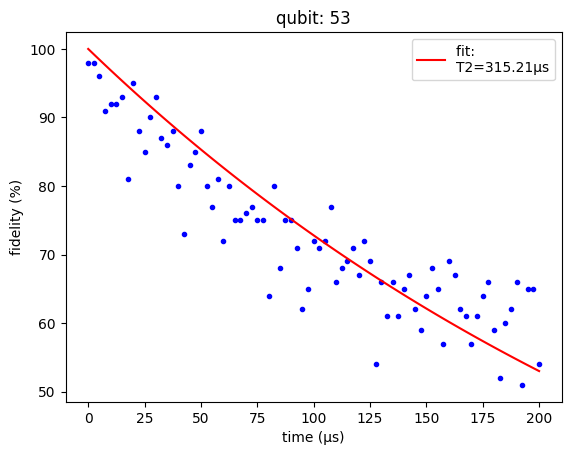

Parámetro T2 estimado: 483.75 μs
T2 real: 280.32 μs


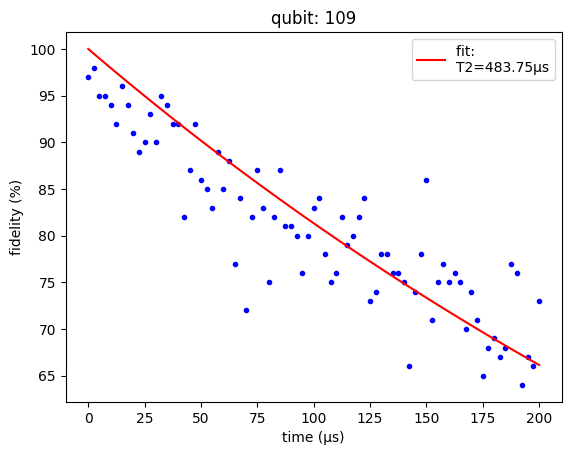

Parámetro T2 estimado: 500.87 μs
T2 real: 279.64 μs


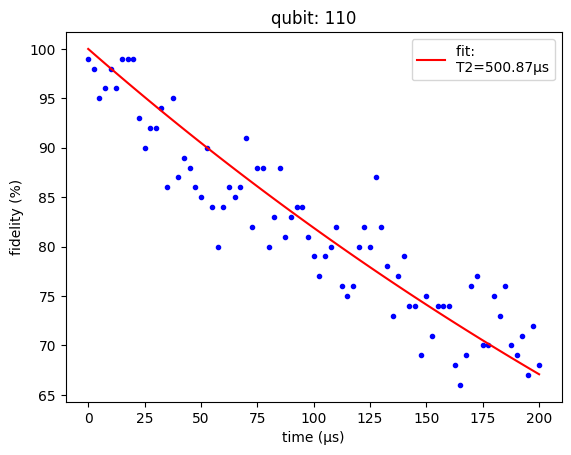

Parámetro T2 estimado: 554.16 μs
T2 real: 273.75 μs


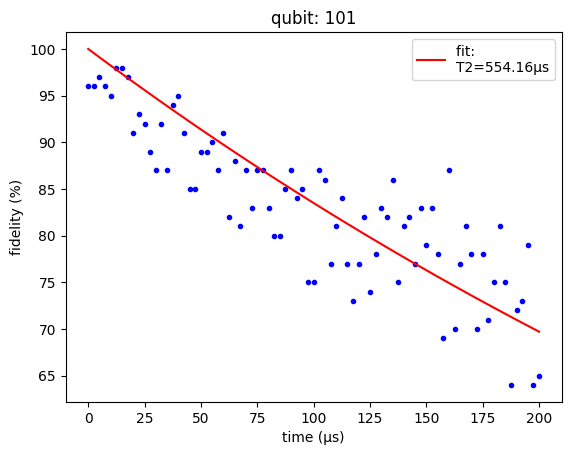

Parámetro T2 estimado: 635.31 μs
T2 real: 248.81 μs


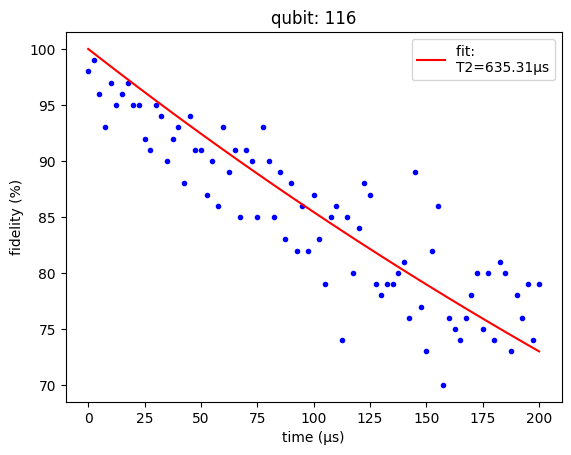

In [15]:
# Definir la función modelo
def model_exp(t, T2):
    return 100 * np.exp(-t/T2)

for q in [0,2,3,4,5,6,7,8]:

    y_data = np.array(y[q])  # Valores de y

    # Ajustar la curva a los datos
    params, covariance = curve_fit(model_exp, t_data, y_data, p0=[1.0])

    # Parámetros ajustados
    T2_estimated = params[0]
    print(f"Parámetro T2 estimado: {round(T2_estimated,2)} μs")
    print(f"T2 real: {round(best_T2_qubits[q].T2,2)} μs")

    y_results = [model_exp(t, *params) for t in t_data]

    plt.plot(t_data, y_data, 'b.')
    plt.plot(t_data, y_results, 'r-', label='fit: \nT2=%5.2fμs' % (T2_estimated))
    plt.xlabel('time (μs)')
    plt.ylabel('fidelity (%)')
    plt.title(f'qubit: {best_T2_qubits[q].Qubit}')
    plt.legend()

    # Display the plot
    plt.show()
